In [1]:
# https://mapas.inmet.gov.br/

SEARCH = "INMET_SE_MG_A562_PATOS DE MINAS"
column = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from zipfile import ZipFile
import datetime
import glob
zips = [name for name in glob.glob(r'data/[0-9][0-9][0-9][0-9].zip')]
print(zips)

['data/2015.zip', 'data/2016.zip', 'data/2017.zip', 'data/2018.zip', 'data/2019.zip', 'data/2020.zip', 'data/2021.zip']


In [3]:
# LIST CSV's
def list_zips():
   i=0
   zip_file = ZipFile(zips[i])
   for text_file in zip_file.infolist():
       if text_file.filename.upper().endswith('.CSV'):
          print(text_file.filename)
#list_zips()

<AxesSubplot:xlabel='time'>

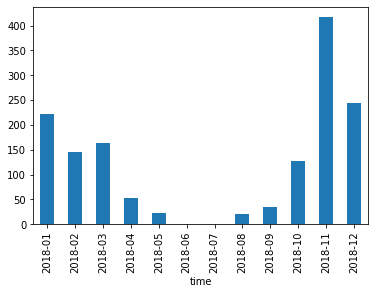

In [4]:
dfs = []
for zip_filename in zips:
    zip_file = ZipFile(zip_filename)
    new = [
       pd.read_csv(zip_file.open(text_file.filename),  header=8, sep=';', quotechar='"',  encoding="ISO-8859-1")
       for text_file in zip_file.infolist()
       if text_file.filename.upper().endswith('.CSV') and SEARCH.upper() in text_file.filename.upper()
    ]
    if len(new) == 0:
        continue
    new = new[-1]
    
    try:
        new["time"] = new["Data"].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d'))
    except KeyError:
        try:
            new["time"] = new["DATA (YYYY-MM-DD)"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))    
        except:
            print("Error on")
            print(new)
            break
    
    new[column] = new[column].str.replace('-9999', '0')
    new[column] = new[column].str.replace(',', '.').astype(float)
    dfs += [new]


i=1
df = pd.concat(dfs)
df = dfs[i]
df[column].groupby(df['time'].dt.to_period('M')).sum().plot(kind='bar')
#s = df.groupby(pd.Grouper(freq="M", key="time"))[column].sum()
